In [1]:
# -*- coding: utf-8 -*-
from underthesea import word_tokenize
import re
import VietnameseTextNormalizer.ReleasePython3.VietnameseTextNormalizer as nm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import wordcloud

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

# 1. Loading and exploring the dataset

## 1.1. Loading the dataset

In [2]:
pd.set_option('display.max_colwidth', None)

In [3]:
dataset = pd.read_csv("uit-posts-dataset.csv")
dataset

,label,text
0,1,[TSSĐH]-THÔNG BÁO TỔ CHỨC LỚP ÔN TẬP CHUẨN BỊ TUYỂN SINH CHƯƠNG TRÌNH ĐÀO TẠO TRÌNH ĐỘ THẠC SĨ ĐỢT 2 NĂM 2020.\nChi tiết mời các bạn xem tại: https://sdh.uit.edu.vn/…/thong-bao-ve-viec-chuc-tap-phuc-vu…
1,1,"💗💗 Giao lưu cùng Nhà báo- Nhà thơ Nguyễn Phong Việt 💗💗\n🎈🎈 Phòng Công tác Sinh viên thân mời các bạn sinh viên tham dự chương trình giao lưu cùng phóng viên, nhà thơ, tác giả sách Nguyễn Phong Việt với chủ đề ""KHI BẠN HỌC MỘT NGHỀ RỒI LÀM NGHỀ MÌNH KHÔNG HỌC"""
2,1,Phòng Công tác Sinh viên thông tin đến sinh viên về thời gian làm việc của Không gian chia sẻ như sau:\nTại Phòng Không gian chia sẻ\n- Thứ 2: từ 08:30 - 15:00...\nXem thêm
3,1,🔬 Các chuyên ngành đào tạo trường Đại học Kansai tại Osaka\n💰 Học phí và học bổng\n❓ Điều kiện tuyển sinh trường Đại học Kansai tại Osaka\n💯 Tất cả thông tin trên xem chi tiết tại link: https://echigo.edu.vn/gioi-thieu-doi-net-ve-truong-dai-hoc…/...\nXem thêm
4,1,"👉 Bật mí với các bạn một chương trình vô cùng hấp dẫn sắp diễn ra, do Nhà Văn hoá Sinh viên phối hợp với Trường ĐH CNTT - ĐHQG TP.HCM tổ chức, hứa hẹn sẽ đem lại cho các bạn sinh viên một buổi tối vô cùng thoả mái sau những giờ học căng thẳng 😁😁\n🌀 Mời tất cả các bạn đến với ""Thanh âm Việt"" lúc 17h, thứ 5 ngày 18/6/2020 tại Giảng đường 1, Trường ĐH CNTT nhé!"
...,...,...
9089,1,Bạn này vừa đến Trường nộp Giấy kết quả thi THPT Quốc gia 2019 để xác nhận nhập học\nVà hoàn thành luôn thủ tục nhập học (nộp học phí và hồ sơ nhập học)
9090,1,Các em nhỏ nhớ đi MHX2020 nha\nChị share để kiểu khai trương group mới .-.\nShare mấy group kia chán òi :>
9091,3,# chào mình đỗ ktpm clc ... bác nào chung khoa làm quen\nƠ mà cái maill edu của trường cấp k giới hạn dung lượng gg drive à.
9092,1,"Chào các bạn, phòng Công tác Sinh viên đã đăng tải hướng dẫn dành cho Tân sinh viên Khóa 2019 tại Forum Trường. Các bạn xem tại đây nha!\nhttps://forum.uit.edu.vn/node/48?fbclid=IwAR1v5RCKNpClPA8bLxg7kquIfrtul7f4IdLA8XvO6pFBHhl4aYP79p4PFAU"


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9094 entries, 0 to 9093
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   9094 non-null   int64 
 1   text    9094 non-null   object
dtypes: int64(1), object(1)
memory usage: 142.2+ KB


## 1.2. Class distribution

In [5]:
dataset["label"].value_counts()

1    3813
3    2439
4    2173
2     669
Name: label, dtype: int64

Text(0.5, 1.0, 'dataset')

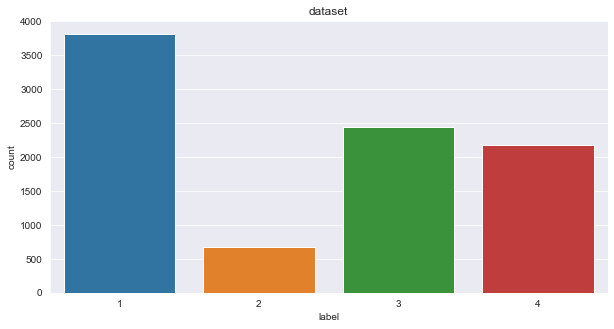

In [6]:
%matplotlib inline
sns.set_style("darkgrid")
fig, axes = plt.subplots(1,1,figsize=(10,5))
sns.countplot(dataset["label"],ax=axes).set_title('dataset')

1. **Thông báo**: các thông báo của trường, của khoa, của các câu lạc bộ, của lớp (thông báo mở lớp); thông báo về học bổng.
2. **Tìm đồ thất lạc**: viết về việc thất lạc đồ hoặc tìm thấy đồ thất lạc.
3. **Thắc mắc, nhờ giúp đỡ** (chủ yếu liên quan đến vấn đề cá nhân): hỏi về trường, nhờ điền form khảo sát, nhờ điền form đăng kí mở lớp, bán lại đồ dùng, thiếu tín chỉ,...
4. **Khác**: các hoạt động của cơ quan, tổ chức bên ngoài như tuyển dụng, quảng cáo khóa học, chương trình bốc thăm, ngày hội công nghệ, tham quan doanh nghiệp,...; các bài không rõ chủ đề hoặc nội dung không đáng quan tâm. 

## 1.3. Taking a look at samples from each classes

In [7]:
thongbao = dataset[dataset['label'].iloc[:] == 1].copy(deep=True)
thongbao.sample(10)

,label,text
3347,1,"Đội hình Gạch Sinh Thái - Một đội hình ""cực mới"" trong Chiến dịch Xuân Tình Nguyện UIT 2019 <3\n#XTN_UIT_2019\n#XuanTinhNguyen2019"
7964,1,Cùng BHTCNTT ôn tập nào <3
8059,1,"Đăng ký liền tay, ngày mai nhận vé nha ✌️"
1151,1,"Nguồn: https://ctsv.uit.edu.vn/…/thong-bao-kiem-tra-sinh-hoat-cong…\nSinh hoạt Công dân Sinh viên đầu Khoá 2017, đầu năm học 2017-2018:\nThời gian làm bài: 60 phút - từ 21:00 ngày thứ hai 25/12/2017 đến 7:00 ngày thứ sáu 29/12/2017...\nXem thêm"
465,1,"Để đảm bảo công tác an ninh trật tự trong thời gian thi. Đề nghị tất cả sinh viên nghiêm túc thực hiện những Thông báo của Ban giám hiệu ,qui định của Nhà truờng về việc đảm bảo an ninh trật tự trong mùa thi cụ thể như sau:\n1️⃣️ Sinh viên phải đeo thẻ sinh viên khi đến trường.\n2️⃣️Cho phép sinh viên mang balo, túi xách có chứa laptop, điện thoại để gần chỗ ngồi trong phòng thi.\n3️⃣️Nghiêm cấm sinh viên lợi dụng việc mang balo túi xách vào phòng thi để gian lận trong thi cử.\n4...\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\nXem thêm"
897,1,[THAM QUAN FSOFT - ĐI VÀO CHIỀU 11/4: THÔNG TIN]\nCác bạn có tên trong danh sách tối nay check mail nhé. Thấy bạn mình có tên trong danh sách thì tag vào hộ anh (mình) luôn <3.
842,1,Bạn nào không đăng ký kịp đợt trước thì có thể đăng ký ngay bây giờ tại: https://goo.gl/forms/3ZUuULnw3rmUjR1F2
6744,1,#UITRUN\nHôm nay UIT RUN tiếp tục thu tiền ở sảnh C từ 10h-13h nha các bạn.Ai đăng kí tham gia thì nhanh chóng xuống đóng tiền nè.
7104,1,Nhanh chân đến GĐ3 để tham gia buổi training CTRR của BHT CNPM nhé các bạn 😀😀😀\n#BHTCNPM
291,1,"UIT Sport+ 2019 - Chuỗi các hoạt động TDTT 2019 sẽ bắt đầu khởi tranh với các môn:\n- Cờ vua, Cờ tướng: Nam, nữ xếp hạng riêng. Thi đấu vào ngày 29/3/2019. (Hạn chót đăng ký 25/3/2019)\n- Bóng bàn: Đơn nam, Đơn nữ, Đôi nam nữ. Thi đấu vào tháng 5/2019 (Hạn chót đăng ký 10/4/2019)\n- Cầu lông: Đơn nam, Đơn nữ, Đôi nam, Đôi nam nữ. Thi đấu vào tháng 5/2019 (Hạn chót đăng ký 10/4/2019)\nLưu ý Đối với các nội dung đôi: 2 VĐV có thể khác khoa, khác khóa, khác lớp. Thành tích thi đấu s...\nXem thêm"


In [9]:
timdo = dataset[dataset['label'].iloc[:] == 2].copy(deep=True)
timdo.sample(10)

,label,text
3942,2,Ai để quên áo ở sảnh C nè :))
8796,2,Chiều nay mình ngồi ở tầng trệt tòa a17 ktx khu a thì thấy có bạn để quên bóp ở bàn bên cạnh. Bóp của bạn nào thì ib mình hoặc ai biết bạn ấy liên hệ giúp mình ạ.
2040,2,[Tìm người thân] Bạn Nguyễn Mạnh Kỳ vào phòng C109 lấy ví về nhé :v\nDeadline 15h30 ngày 21/3/2017
5183,2,Chìa khóa của bạn nào đánh rơi nè.... Gặp c308 trước 3h để lại nha
4806,2,"Chào các bạn\nHôm thứ 6 ngày 27/12 mình có để quên hoặc đánh rơi tai nghe KZ ATE (như hình) ở đâu đó trên trường :( không biết có bạn nào nhặt được cho mình xin lại với nha, mình ko có nhiều nhưng sẽ hậu tạ cho bạn.\nMình cảm ơn các bạn"
8302,2,Buổi chiều hôm qua ở bãi xe của trung tâm giáo dục quốc phòng mình có lượm được một tai nghe (như trong hình).\nBạn nào làm rơi thì sáng thứ 2 qua đại đội 5 tiểu đội 8 mình trả lại cho.
8045,2,"Mình nhặt được một thẻ sinh viên trước ministop, ktx khu A.\nLiên hệ mình để lấy lại nha."
3777,2,Của ai thì lên c202 nhận nhoa 😀
3578,2,"Vừa rồi tại phòng C114 môn Giải tích, mình lựm được 1 Casio 570ES bị bể góc như hình. Máy của bạn nào bỏ quên thì inbox mình để nhận lại nhé. 💜💜"
5651,2,Nhẫn bạn nào quên ở gian hàng CTXH liên hệ lấy lại nha


In [10]:
hoidap = dataset[dataset['label'].iloc[:] == 3].copy(deep=True)
hoidap.sample(10)

,label,text
5513,3,Mọi người làm giúp mình khảo sát về Thời Gian Sử Dụng Internet của sinh viên.\nCảm ơn các bạn rất nhiều.\nLink:
5548,3,https://docs.google.com/…/1FAIpQLSe0K0_cep0tYd-Xa…/viewform…\nCác bạn cho mình xin chút thời gian để làm khảo sát môn học của mình với.\nCảm ơn mấy bạn nhiều nhiều <3
105,3,ĐĂNG KÝ XIN MỞ LỚP MÔN LÝ THUYẾT THÔNG TIN\nNhững bạn/anh/chị nào muốn học môn Lý thuyết thông tin kỳ 2 này thì đăng ký nhé!!! :)\nLink: https://forms.gle/8dXEXpgCCsiqFFSYA...\nXem thêm
6465,3,"Chào các bạn, hiện tại nhóm mình đang làm khảo sát môn Kĩ năng nghề nghiệp. Mong các bạn bỏ chút thời gian làm khảo sát giúp nhóm mình.\nMình xin cảm ơn!"
630,3,"Hệ thống thông tin kế toán, ai cần thì đăng kí:"
7089,3,Các cao nhân cho e cách giải bài 3 đi ạ
329,3,"[ KHẢO SÁT NHỎ - VẤN ĐỀ ANH VĂN ĐẦU RA KHÓA 2015 ]\nCho mình hỏi trong group K10: hiện có bao nhiêu bạn chưa học AV3 và đã từng nghe đại diện PĐT trả lời (trực tiếp hoặc qua mail) rằng: ""Khóa 2015 không cần hoàn thành 3 AV, trước khi Tốt nghiệp chỉ cần nộp bằng là được công nhận hoàn thành yêu cầu về AV"".\n------\nHiện tại, theo thông báo mới nhất là các khóa (kể cả khóa 2015) đều phải hoàn thành 3 môn Anh văn và đủ chứng chỉ Toeic mới :)"
2264,3,immediate của ABC các bác ra bao nhiêu thế\nlấy PC + 16 phải không
4030,3,"Mình đang cần tiền về tết nên bán gấp 1 con macbook pro 2011 Máy ông anh mua xách tay bên Thái về!\nTóm tắt cấu hình ram 16gb, sdd 256gb, hdd 1T\nmáy còn sài rất ổn định nên test thoài mái!\nGiá e nó là 13tr có fix cho bác nào thật sự muốn mua!\nMong mn thông cảm cho bài viết này khi đăng lên đây! Cảm ơn tất cả mn!"
7917,3,Có bạn nào học lớp Giới thiệu ngành IT009.K211.CLC của thầy Khang không cho mình xin code với😭😭\nChiều nay học rồi mà nãy mình dò lại thì thấy thiếu code lớp này... Plssss


In [11]:
khac = dataset[dataset['label'].iloc[:] == 4].copy(deep=True)
khac.sample(10)

,label,text
5278,4,cái loa xịn vcl ra :)
2437,4,chăm chỉ F5 vận may sẽ tới ai chung lịch ko :v
8797,4,Hóng quá mấy bạn êyyy\nĐố mấy bạn có bao nhiêu ng trong bức ảnh nè ? 😃
4610,4,sống là phải chất :D
7639,4,"Nếu vẽ đồ thị là một môn nghệ thuật, vậy thì ở UIT có huyền thoại nào là một nghệ sĩ nhỉ😂🤫"
3563,4,Có ai đam mê guitar như mình không.🤩🤩🤩\nĐi chung vs mình nek.🤗🤗🤗\nLink: https://www.facebook.com/guitardhqg/
2075,4,"Ôi, những kỉ niệm lại ùa về <feeling cảm động>"
4670,4,đi ăn cơm các bác ơi
2622,4,❌ĐỨC GUITAR - HỌC GUITAR ĐỆM HÁT MIỄN PHÍ - 19/11 & 20/11❌\n--------------------\n☀ Bạn đam mê guitar đệm hát?\n☀ Bạn muốn có một tài lẻ để thư giãn và chứng tỏ mình?\n☀ Bạn muốn thành thạo guitar trong 2 tháng?...\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\nXem thêm
8346,4,"Thật ra thính là cái chỗ điểm rèn luyện siêu to á, với khúc loot ""trái tim"" ai đó nữa thì nghe ghê quá.... but i like it !!!! 😁😁😁"


## 1.4. Text length distribution

In [12]:
thongbao["length"] = thongbao.text.apply(lambda x: len(x))
timdo["length"] = timdo.text.apply(lambda x: len(x))
hoidap["length"] = hoidap.text.apply(lambda x: len(x))
khac["length"] = khac.text.apply(lambda x: len(x))

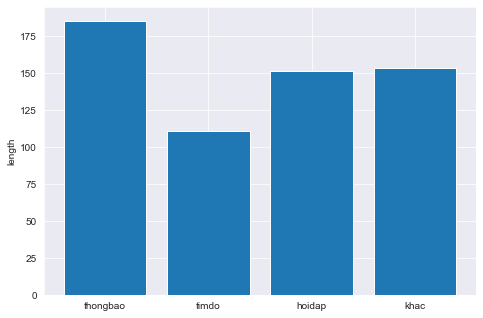

In [13]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
topic = ['thongbao', 'timdo', 'hoidap', 'khac']
mean_length = [thongbao["length"].mean(),timdo["length"].mean(),hoidap["length"].mean(),khac["length"].mean()]
plt.bar(topic, mean_length)
plt.ylabel("length")
plt.show()

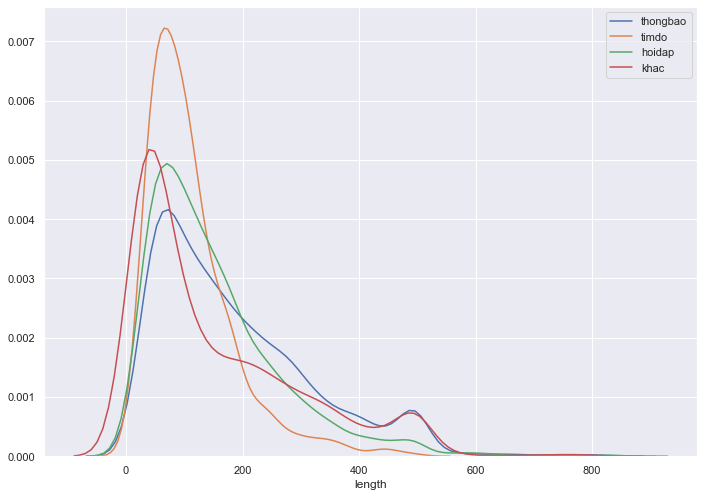

In [14]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(thongbao.length, hist=False, label="thongbao")
sns.distplot(timdo.length, hist=False, label="timdo")
sns.distplot(hoidap.length, hist=False, label="hoidap")
sns.distplot(khac.length, hist=False, label="khac")
plt.legend()

# 2. Extracting features

## 2.1. Preprocessing

In [15]:
abbr_dict={
    "ko":"không",
    "hok":"không",
    "hông":"không",
    "mn":"bạn",
    "ae":"bạn",
    "bợn":"bạn",
    "vs":"với",
    "sr":"xin lỗi",
    "help":"giúp",
    "thank":"cảm ơn",
    "thanks":"cảm ơn",
    "cám ơn":"cảm ơn",
    "tks":"cảm ơn",
    "kq":"kết quả",
    "kqua":"kết quả",
    "nhe":"nhé",
    "nhá":"nhé",
    "nha":"nhé",
    "h":"giờ",
    "s":"sao",
    "pls":"",
    "plz":"",
    "me":"mình",
    "mị":"mình",
    "đc":"được",
    "dc":"được",
    "tgian": "thời gian"
}

In [16]:
def replace_abbr(t):
    if t in abbr_dict:
        return abbr_dict[t]
    else:
        return t

In [17]:
def removeConsecutiveDuplicates(S): 
    S = list(S.rstrip()) 
    
    n = len(S)  
    
    if (n < 2) : 
        return S[0]
           
    j = 0
       
    for i in range(n):  
        if (S[j] != S[i]): 
            j += 1
            S[j] = S[i]  
      
    j += 1
    S = S[:j]
    return "".join(S)

In [18]:
def preprocessing(s, show_stepbystep=False, remove_stop_words=True):
    if show_stepbystep:
        print("original:")
        print(s)
        print()
    
    # remove 'Xem thêm'
    s = re.sub('Xem thêm', '', s)
    if show_stepbystep:
        print("remove 'Xem thêm':")
        print(s)
        print()

    # convert to lower case
    s = s.lower()
    if show_stepbystep:
        print("lowercase:")
        print(s)
        print()
    
    # normalize Vietnamese
    s = nm.ASRNormalize(s)
    if show_stepbystep:
        print("normalized Vietnamese:")
        print(s)
        print()
    
    # abbreviate some names
    s = re.sub('kỹ thuật phần mềm', 'ktpm', s)
    s = re.sub('công nghệ phần mềm', 'cnpm', s)
    s = re.sub('khoa học máy tính', 'khmt', s)
    s = re.sub('hệ thống thông tin', 'httt', s)
    s = re.sub('kỹ thuật máy tính', 'ktmt', s)
    s = re.sub('thương mại điện tử', 'tmđt', s)
    s = re.sub('công nghệ thông tin', 'cntt', s)
    s = re.sub('an toàn thông tin', 'attt', s)
    s = re.sub('công tác sinh viên', 'ctsv', s)
    s = re.sub('ban học tập', 'bht', s)
    if show_stepbystep:
        print("abbreviate faculty name:")
        print(s)
        print()
    
    # remove urls and hashtags
    s = re.sub(r'http\S+', '', s)
    s = re.sub(r'#\S+', '', s)
    if show_stepbystep:
        print('remove urls and hashtags:')
        print(s)
        print()
    
    # remove email address
    s = re.sub(r'\S*@\S*\s?', '', s)
    if show_stepbystep:
        print('remove email addresses:')
        print(s)
        print()
    
    # split into words
    tokens = word_tokenize(s)
    if show_stepbystep:
        print('tokenize:')
        print(tokens)
        print()
    
    # remove punctuation and number
    words = [word for word in tokens if re.sub(r"\s+", "", word).isalpha()]
    if show_stepbystep:
        print('remove punctuation:')
        print(words)
        print()
    
    # remove consecutive duplicates character
    words = [removeConsecutiveDuplicates(word) for word in words]
    if show_stepbystep:
        print('remove consecutive duplicates character:')
        print(words)
        print()
    
    # replace abbreviation of word
    words = [replace_abbr(word) for word in words]
    if show_stepbystep:
        print('replace abbreviation:')
        print(words)
        print()
        
    # remove stop words
    if remove_stop_words:
        words = [word for word in words if not word in stop_words]
        if show_stepbystep:
            print('remove stop words:')
            print(words)
            print()
            
    # replace " " with "_"
    words = [re.sub(r"\s+", "_", word) for word in words]
    if show_stepbystep:
        print('replace space with "_" :')
        print(words)
        print()
    
    # remove single character
    words = [word for word in words if len(word)>1]
    if show_stepbystep:
        print('remove single character:')
        print(words)
        print()
    
    return ' '.join(words)

In [19]:
preprocessing(dataset.iloc[3]['text'], remove_stop_words=False, show_stepbystep=True)

original:
🔬 Các chuyên ngành đào tạo trường Đại học Kansai tại Osaka
💰 Học phí và học bổng
❓ Điều kiện tuyển sinh trường Đại học Kansai tại Osaka
💯 Tất cả thông tin trên xem chi tiết tại link: https://echigo.edu.vn/gioi-thieu-doi-net-ve-truong-dai-hoc…/...
Xem thêm

remove 'Xem thêm':
🔬 Các chuyên ngành đào tạo trường Đại học Kansai tại Osaka
💰 Học phí và học bổng
❓ Điều kiện tuyển sinh trường Đại học Kansai tại Osaka
💯 Tất cả thông tin trên xem chi tiết tại link: https://echigo.edu.vn/gioi-thieu-doi-net-ve-truong-dai-hoc…/...


lowercase:
🔬 các chuyên ngành đào tạo trường đại học kansai tại osaka
💰 học phí và học bổng
❓ điều kiện tuyển sinh trường đại học kansai tại osaka
💯 tất cả thông tin trên xem chi tiết tại link: https://echigo.edu.vn/gioi-thieu-doi-net-ve-truong-dai-hoc…/...


normalized Vietnamese:
🔬 các chuyên ngành đào tạo trường đại học kansai tại osaka
💰 học phí và học bổng
❓ điều kiện tuyển sinh trường đại học kansai tại osaka
💯 tất cả thông tin trên xem chi tiết tại link:

'các chuyên_ngành đào_tạo trường đại_học kansai tại osaka học_phí và học_bổng điều_kiện tuyển_sinh trường đại_học kansai tại osaka tất_cả thông_tin trên xem chi_tiết tại link'

In [20]:
dataset['preprocessed'] = [preprocessing(dataset.iloc[i]['text'], remove_stop_words=False) for i in range(dataset.shape[0])]

In [21]:
dataset

,label,text,preprocessed
0,1,[TSSĐH]-THÔNG BÁO TỔ CHỨC LỚP ÔN TẬP CHUẨN BỊ TUYỂN SINH CHƯƠNG TRÌNH ĐÀO TẠO TRÌNH ĐỘ THẠC SĨ ĐỢT 2 NĂM 2020.\nChi tiết mời các bạn xem tại: https://sdh.uit.edu.vn/…/thong-bao-ve-viec-chuc-tap-phuc-vu…,tsđh thông_báo tổ_chức lớp ôn_tập chuẩn_bị tuyển_sinh chương_trình đào_tạo trình_độ thạc_sĩ đợt năm chi_tiết mời các bạn xem tại
1,1,"💗💗 Giao lưu cùng Nhà báo- Nhà thơ Nguyễn Phong Việt 💗💗\n🎈🎈 Phòng Công tác Sinh viên thân mời các bạn sinh viên tham dự chương trình giao lưu cùng phóng viên, nhà thơ, tác giả sách Nguyễn Phong Việt với chủ đề ""KHI BẠN HỌC MỘT NGHỀ RỒI LÀM NGHỀ MÌNH KHÔNG HỌC""",giao_lưu cùng nhà_báo nhà_thơ nguyễn_phong_việt phòng ctsv thân mời các bạn sinh_viên tham_dự chương_trình giao_lưu cùng phóng_viên nhà_thơ tác_giả sách nguyễn_phong_việt với chủ_đề khi bạn học một nghề rồi làm nghề mình không học
2,1,Phòng Công tác Sinh viên thông tin đến sinh viên về thời gian làm việc của Không gian chia sẻ như sau:\nTại Phòng Không gian chia sẻ\n- Thứ 2: từ 08:30 - 15:00...\nXem thêm,phòng ctsv thông_tin đến sinh_viên về thời_gian làm_việc của không_gian chia_sẻ như sau tại phòng không_gian chia_sẻ thứ từ
3,1,🔬 Các chuyên ngành đào tạo trường Đại học Kansai tại Osaka\n💰 Học phí và học bổng\n❓ Điều kiện tuyển sinh trường Đại học Kansai tại Osaka\n💯 Tất cả thông tin trên xem chi tiết tại link: https://echigo.edu.vn/gioi-thieu-doi-net-ve-truong-dai-hoc…/...\nXem thêm,các chuyên_ngành đào_tạo trường đại_học kansai tại osaka học_phí và học_bổng điều_kiện tuyển_sinh trường đại_học kansai tại osaka tất_cả thông_tin trên xem chi_tiết tại link
4,1,"👉 Bật mí với các bạn một chương trình vô cùng hấp dẫn sắp diễn ra, do Nhà Văn hoá Sinh viên phối hợp với Trường ĐH CNTT - ĐHQG TP.HCM tổ chức, hứa hẹn sẽ đem lại cho các bạn sinh viên một buổi tối vô cùng thoả mái sau những giờ học căng thẳng 😁😁\n🌀 Mời tất cả các bạn đến với ""Thanh âm Việt"" lúc 17h, thứ 5 ngày 18/6/2020 tại Giảng đường 1, Trường ĐH CNTT nhé!",bật_mí với các bạn một chương_trình vô_cùng hấp_dẫn sắp diễn ra do nhà_văn_hóa sinh_viên phối_hợp với trường đh cnt đhqg tổ_chức hứa_hẹn sẽ đem lại cho các bạn sinh_viên một buổi tối vô_cùng thỏa mái sau những giờ học căng_thẳng mời tất_cả các bạn đến với thanh_âm việt lúc thứ ngày tại giảng_đường trường đh cnt nhé
...,...,...,...
9089,1,Bạn này vừa đến Trường nộp Giấy kết quả thi THPT Quốc gia 2019 để xác nhận nhập học\nVà hoàn thành luôn thủ tục nhập học (nộp học phí và hồ sơ nhập học),bạn này vừa đến trường nộp giấy kết_quả thi thpt quốc_gia để xác_nhận nhập_học và hoàn_thành luôn thủ_tục nhập_học nộp học_phí và hồ_sơ nhập_học
9090,1,Các em nhỏ nhớ đi MHX2020 nha\nChị share để kiểu khai trương group mới .-.\nShare mấy group kia chán òi :>,các em nhỏ nhớ đi nhé chị share để kiểu khai_trương group mới share mấy group kia chán òi
9091,3,# chào mình đỗ ktpm clc ... bác nào chung khoa làm quen\nƠ mà cái maill edu của trường cấp k giới hạn dung lượng gg drive à.,chào mình đỗ ktpm clc bác nào chung khoa làm_quen mà cái mail edu của trường cấp giới_hạn dung_lượng drive
9092,1,"Chào các bạn, phòng Công tác Sinh viên đã đăng tải hướng dẫn dành cho Tân sinh viên Khóa 2019 tại Forum Trường. Các bạn xem tại đây nha!\nhttps://forum.uit.edu.vn/node/48?fbclid=IwAR1v5RCKNpClPA8bLxg7kquIfrtul7f4IdLA8XvO6pFBHhl4aYP79p4PFAU",chào các bạn phòng ctsv đã đăng_tải hướng_dẫn dành cho tân sinh_viên khóa tại forum trường các bạn xem tại đây nhé


In [28]:
all_text = " ".join(text for text in dataset.preprocessed)

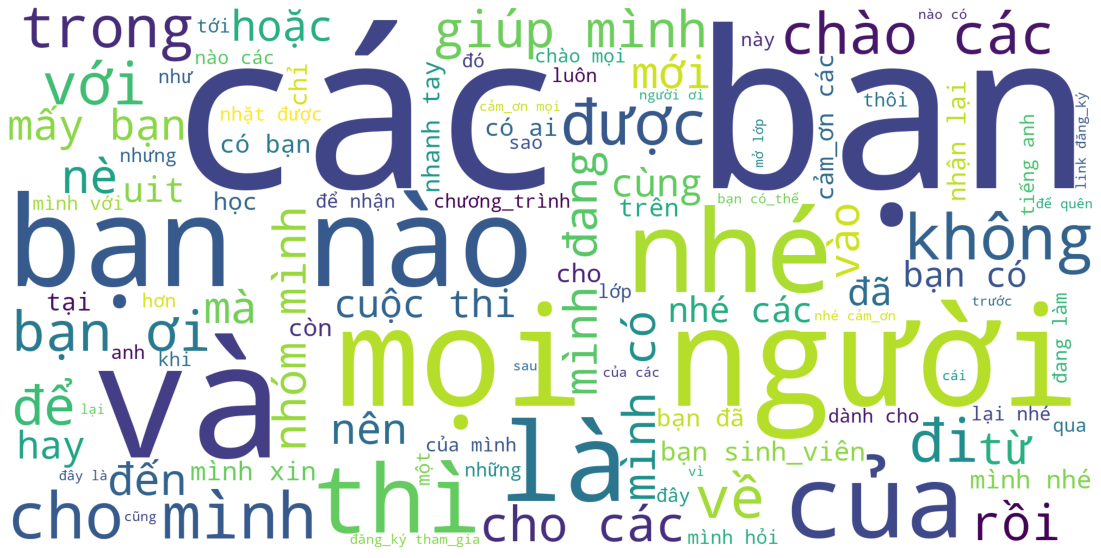

In [29]:
cloud = np.array(all_text).flatten()
plt.figure(figsize=(20,10))
word_cloud = wordcloud.WordCloud(max_words=100,background_color ="white",
                               width=2000,height=1000,mode="RGB").generate(str(cloud))
plt.axis("off")
plt.imshow(word_cloud)

## 2.2. Turn the text content into numerical feature vectors

In [36]:
# tf = TfidfVectorizer(min_df=10,max_df= 0.8,max_features=4000,sublinear_tf=True)

tfidf_vectorizer = TfidfVectorizer(min_df=10,max_df= 0.8,max_features=4000,sublinear_tf=True, use_idf=True)

X = tfidf_vectorizer.fit_transform(dataset['preprocessed'])

print(len(tfidf_vectorizer.get_feature_names()))

1918


In [37]:
x0 = X[0]

# place tf-idf values in a pandas data frame
df = pd.DataFrame(x0.T.todense(), index=tfidf_vectorizer.get_feature_names(), columns=["tfidf"])
df = df.sort_values(by=["tfidf"],ascending=False)
df.head(20)

,tfidf
trình_độ,0.355890
tuyển_sinh,0.327182
đào_tạo,0.297437
đợt,0.279208
ôn_tập,0.275509
chuẩn_bị,0.260863
chi_tiết,0.259213
mời,0.251398
thông_báo,0.237342
tổ_chức,0.236920


In [38]:
dataset.iloc[0]['preprocessed']

'tsđh thông_báo tổ_chức lớp ôn_tập chuẩn_bị tuyển_sinh chương_trình đào_tạo trình_độ thạc_sĩ đợt năm chi_tiết mời các bạn xem tại'

# 3. Training the classifier

## 3.1. Splitting into training and validation sets

In [39]:
y = dataset['label']

In [40]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=10,shuffle=True, stratify=y)

## 3.2. Training and choosing models

In [71]:
def get_f1_scores(c_report):
    s = c_report.split()
    return [float(s[7]), float(s[12]), float(s[17]), float(s[22])]

models_metric = []

### Logistic Regression

In [72]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=150, solver='lbfgs', multi_class='multinomial')
model.fit(X_train,y_train)
y_pre = model.predict(X_test)
metrics = classification_report(y_test,y_pre)
models_metric.append(get_f1_scores(metrics))
print(metrics)

              precision    recall  f1-score   support

           1       0.81      0.88      0.84       763
           2       0.98      0.88      0.93       134
           3       0.87      0.86      0.87       488
           4       0.74      0.65      0.69       434

   micro avg       0.82      0.82      0.82      1819
   macro avg       0.85      0.82      0.83      1819
weighted avg       0.82      0.82      0.82      1819



### Naive Bayes classifier

In [73]:
from sklearn.naive_bayes import MultinomialNB

clf = MultinomialNB()
clf.fit(X, y)
y_pre = clf.predict(X_test)
metrics = classification_report(y_test,y_pre)
models_metric.append(get_f1_scores(metrics))
print(metrics)

              precision    recall  f1-score   support

           1       0.77      0.90      0.83       763
           2       0.99      0.90      0.95       134
           3       0.82      0.90      0.86       488
           4       0.81      0.51      0.63       434

   micro avg       0.81      0.81      0.81      1819
   macro avg       0.85      0.80      0.81      1819
weighted avg       0.81      0.81      0.80      1819



### Linear Support Vector Classification

In [74]:
from sklearn.svm import LinearSVC

lsvc = LinearSVC()
lsvc.fit(X_train,y_train)
y_pre = lsvc.predict(X_test)
metrics = classification_report(y_test,y_pre)
models_metric.append(get_f1_scores(metrics))
print(metrics)

              precision    recall  f1-score   support

           1       0.83      0.87      0.85       763
           2       0.96      0.96      0.96       134
           3       0.86      0.86      0.86       488
           4       0.72      0.66      0.69       434

   micro avg       0.82      0.82      0.82      1819
   macro avg       0.84      0.84      0.84      1819
weighted avg       0.82      0.82      0.82      1819



In [95]:
grid_predictions = grid.predict(X_test) 
  
# print classification report 
print(classification_report(y_test, grid_predictions)) 

              precision    recall  f1-score   support

           1       0.80      0.90      0.84       763
           2       0.98      0.94      0.96       134
           3       0.87      0.87      0.87       488
           4       0.76      0.61      0.67       434

   micro avg       0.82      0.82      0.82      1819
   macro avg       0.85      0.83      0.84      1819
weighted avg       0.82      0.82      0.82      1819



In [75]:
print(models_metric)

[[0.84, 0.93, 0.87, 0.69], [0.83, 0.95, 0.86, 0.63], [0.85, 0.96, 0.86, 0.69]]


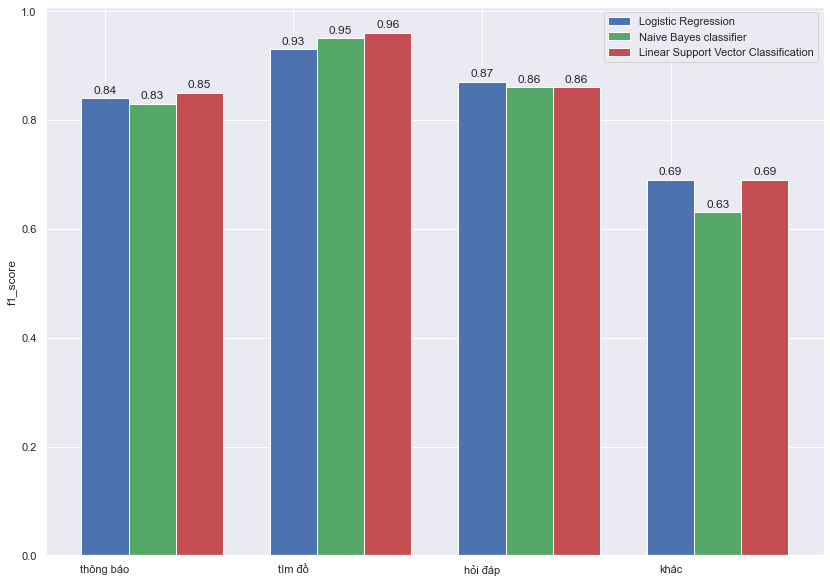

In [83]:
labels = ['thông báo', 'tìm đồ', 'hỏi đáp', 'khác']

fig, ax = plt.subplots()
rects1 = ax.bar(u + 0.00, models_metric[0], color = 'b', width = 0.25, label='Logistic Regression')
rects2 = ax.bar(u + 0.25, models_metric[1], color = 'g', width = 0.25, label="Naive Bayes classifier")
rects3 = ax.bar(u + 0.50, models_metric[2], color = 'r', width = 0.25, label='Linear Support Vector Classification')
# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('f1_score')
# ax.set_title('Scores by group and gender')
ax.set_xticks(u)
ax.set_xticklabels(labels)
ax.legend()

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)
autolabel(rects3)

fig.tight_layout()

According to the bar chart, I **choose Linear SVC model**.

# 4. Tuning hyperparameters

## 4.1. Parameter tuning using grid search

In [118]:
from sklearn.model_selection import GridSearchCV 
  
# defining parameter range 
param_grid = {'C': [0.01, 0.1, 1, 100, 1000]}  
  
grid = GridSearchCV(LinearSVC(), param_grid, cv=5, n_jobs=-1) 
  
# fitting the model for grid search 
grid.fit(X, y) 

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'C': [0.01, 0.1, 1, 100, 1000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [119]:
# print best parameter after tuning 
print(grid.best_params_) 
  
# print how our model looks after hyper-parameter tuning 
print(grid.best_estimator_)

{'C': 0.1}
LinearSVC(C=0.1, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)


In [120]:
grid_predictions = grid.predict(X_test) 
  
# print classification report 
print(classification_report(y_test, grid_predictions)) 

              precision    recall  f1-score   support

           1       0.85      0.93      0.89       763
           2       0.98      0.96      0.97       134
           3       0.91      0.92      0.92       488
           4       0.84      0.71      0.77       434

   micro avg       0.88      0.88      0.88      1819
   macro avg       0.90      0.88      0.89      1819
weighted avg       0.88      0.88      0.88      1819



## 4.2. Trying different hyperparameters and plotting learning curves

Automatically created module for IPython interactive environment


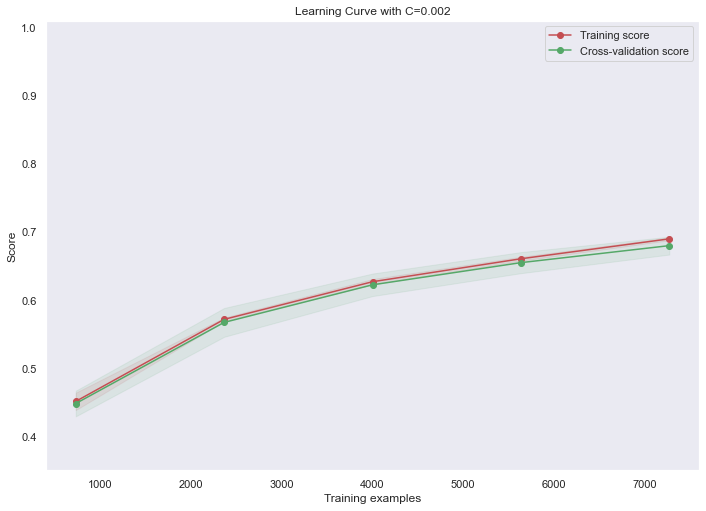

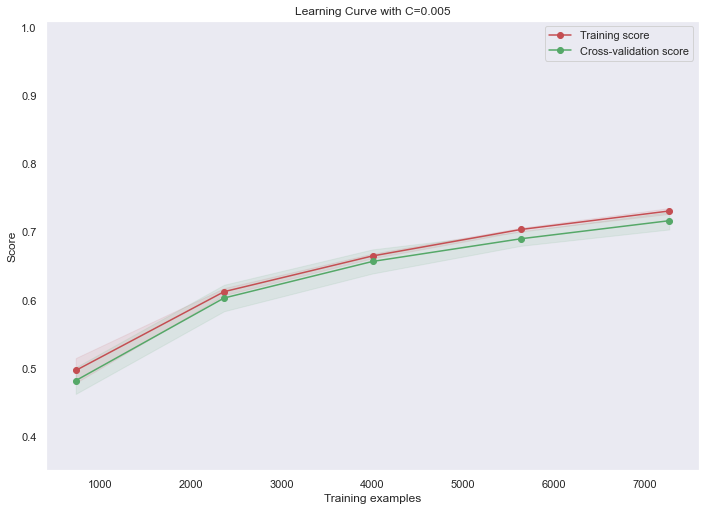

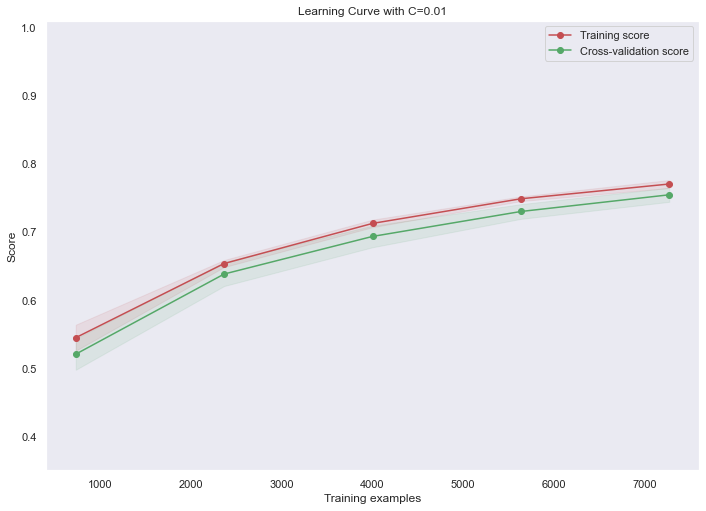

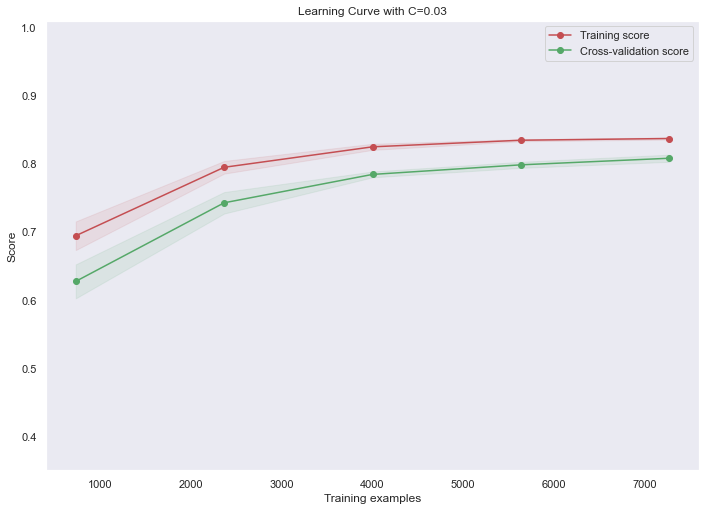

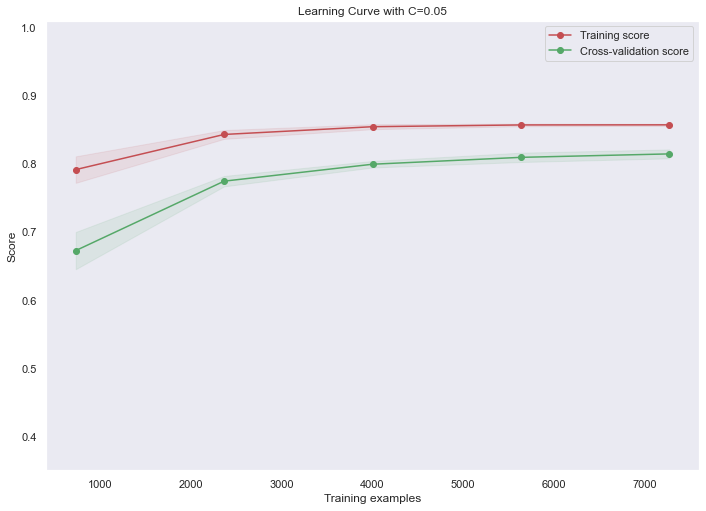

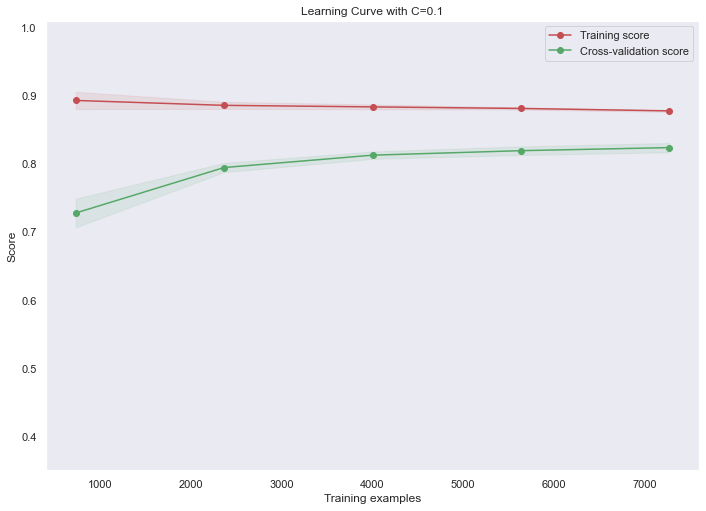

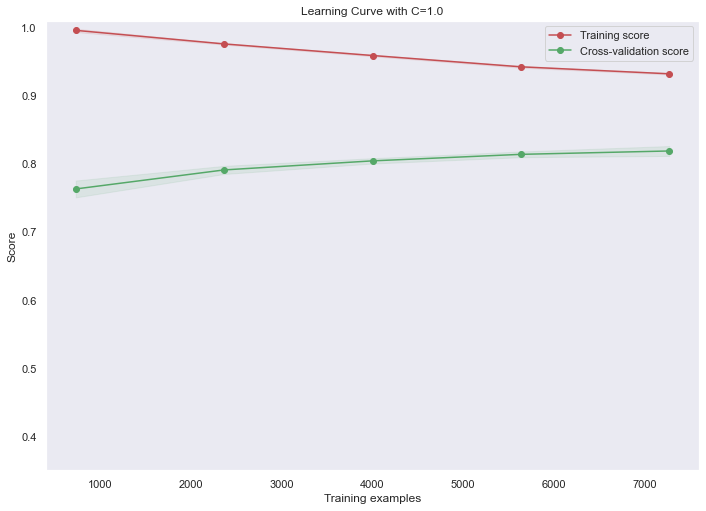

In [152]:
print(__doc__)

from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit


def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate a simple plot of the test and training learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : int, cross-validation generator or an iterable, optional
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:
          - None, to use the default 3-fold cross-validation,
          - integer, to specify the number of folds.
          - :term:`CV splitter`,
          - An iterable yielding (train, test) splits as arrays of indices.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : int or None, optional (default=None)
        Number of jobs to run in parallel.
        ``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.
        ``-1`` means using all processors. See :term:`Glossary <n_jobs>`
        for more details.

    train_sizes : array-like, shape (n_ticks,), dtype float or int
        Relative or absolute numbers of training examples that will be used to
        generate the learning curve. If the dtype is float, it is regarded as a
        fraction of the maximum size of the training set (that is determined
        by the selected validation method), i.e. it has to be within (0, 1].
        Otherwise it is interpreted as absolute sizes of the training sets.
        Note that for classification the number of samples usually have to
        be big enough to contain at least one sample from each class.
        (default: np.linspace(0.1, 1.0, 5))
    """
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

title = "Learning Curve with C=0.002"
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
estimator = LinearSVC(C=0.005)
plot_learning_curve(estimator, title, X, y, (0.35, 1.01), cv=cv, n_jobs=4)

title = "Learning Curve with C=0.005"
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
estimator = LinearSVC(C=0.007)
plot_learning_curve(estimator, title, X, y, (0.35, 1.01), cv=cv, n_jobs=4)

title = "Learning Curve with C=0.01"
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
estimator = LinearSVC(C=0.01)
plot_learning_curve(estimator, title, X, y, (0.35, 1.01), cv=cv, n_jobs=4)

title = "Learning Curve with C=0.03"
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
estimator = LinearSVC(C=0.03)
plot_learning_curve(estimator, title, X, y, (0.35, 1.01), cv=cv, n_jobs=4)

title = "Learning Curve with C=0.05"
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
estimator = LinearSVC(C=0.05)
plot_learning_curve(estimator, title, X, y, (0.35, 1.01), cv=cv, n_jobs=4)

title = "Learning Curve with C=0.1"
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
estimator = LinearSVC(C=0.1)
plot_learning_curve(estimator, title, X, y, (0.35, 1.01), cv=cv, n_jobs=4)

title = "Learning Curve with C=1.0"
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
estimator = LinearSVC(C=1.0)
plot_learning_curve(estimator, title, X, y, (0.35, 1.01), cv=cv, n_jobs=4)

plt.show()

I choose **C=0.03**

## 4.3. Training and saving the final model

In [153]:
model = LinearSVC(C=0.03)
model.fit(X_train,y_train)
y_pre = model.predict(X_test)
metrics = classification_report(y_test,y_pre)
print(metrics)

              precision    recall  f1-score   support

           1       0.76      0.91      0.83       763
           2       0.97      0.89      0.93       134
           3       0.85      0.86      0.86       488
           4       0.80      0.51      0.62       434

   micro avg       0.80      0.80      0.80      1819
   macro avg       0.84      0.79      0.81      1819
weighted avg       0.81      0.80      0.79      1819



In [154]:
import pickle

# save the model to disk
filename = 'finalized_model.sav'
pickle.dump(model, open(filename, 'wb'))

In [156]:
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_test, y_test)
print(result)

0.8020890599230346


In [157]:
loaded_model

LinearSVC(C=0.03, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)